In [34]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 500)

In [13]:
engine = create_engine('postgresql://mlanciau@localhost:5432/mlanciau')
conn = engine.connect();

# Last 20 tweets about PostgreSQL

In [33]:
pd.read_sql('''
SELECT *
FROM mlanciau_staging.v_twitter_postgresql
ORDER BY c_id DESC
LIMIT 20
''', conn)

,c_id,c_text,c_lang,c_retweet,c_created_at,c_loaded_at
0,1520624747972767746,findyは職務履歴書でPostgreSQLが登録できなくて\nたぶんバグがあるか、あるいはアンチPostgreSQL派なんだろうなと思った,ja,False,2022-05-01 04:42:46+00:00,2022-05-01 04:45:02.325048+00:00
1,1520619437639933952,"I do this for services like Redis, Redpanda, Kafka, Postgresql, etc. I no longer install them on my machine. Whenever I mess them up, just Ctrl+C and then run again. https://t.co/Xu0hixC0jC",en,False,2022-05-01 04:21:40+00:00,2022-05-01 04:25:02.172933+00:00
2,1520613078416588801,RT @kkaigai: @henrich そ、そう？\n自分が知ってるだけでもPostgreSQLロシア勢とかキレッキレだし、経済ブロックが原因で才能を活かせないのはもったいないなぁ…と。,ja,True,2022-05-01 03:56:24+00:00,2022-05-01 04:25:02.172933+00:00
3,1520611876874424320,RT @devguyahnaf: @thakkar_puru HTML\nCSS\nPython\nFlask\nMongoDB\nJavaScript\nNode.js\nReact\nMySQL\nTypeScript\nTailwind\nDocker\nNext.js\nFastAPI\nJava…,en,True,2022-05-01 03:51:37+00:00,2022-05-01 04:25:02.172933+00:00
4,1520611827515891713,RT @devguyahnaf: @thakkar_puru HTML\nCSS\nPython\nFlask\nMongoDB\nJavaScript\nNode.js\nReact\nMySQL\nTypeScript\nTailwind\nDocker\nNext.js\nFastAPI\nJava…,en,True,2022-05-01 03:51:25+00:00,2022-05-01 04:25:02.172933+00:00
5,1520609029537808392,"@InfiniDream1 @dhiwise coded nodejs generator is so versatile. \n\nIt supports:\n\n✅ MVC / CC Architecture\n✅ @MongoDB @PostgreSQL @SQLServer\n@MySQL\n✅ Export @getpostman collection\n✅ Test cases, hooks, indexes, role permission, CRUD with middleware\n\nCheck by yourself 😃\n\nhttps://t.co/58ru4xsCK5",en,False,2022-05-01 03:40:18+00:00,2022-05-01 04:25:02.172933+00:00
6,1520608266362839042,RT @DarkReading: Microsoft this week patched two dangerous vulnerabilities in its Azure Database for PostgreSQL Flexible Server that gave a…,en,True,2022-05-01 03:37:16+00:00,2022-05-01 04:25:02.172933+00:00
7,1520607417796820992,Improving Query Performance in PostgreSQL. Learn how to structure your PostgreSQL queries to run in a fraction of the time https://t.co/rjZWRrikOV #sql #query #performance,en,False,2022-05-01 03:33:54+00:00,2022-05-01 04:25:02.172933+00:00
8,1520604891995000832,Learn a Database:\nSQL NoSQL\nPostgreSQL MongoDB\nOracle Firebase\nMySQL Cassandra,en,False,2022-05-01 03:23:52+00:00,2022-05-01 04:25:02.172933+00:00
9,1520601510819680256,@biantaishabi @BianTaiAiChiRou rk3399 我安装了arm的python ruby redis-server PostgreSQL openjdk Ubuntu-desktop:20.04,en,False,2022-05-01 03:10:26+00:00,2022-05-01 04:25:02.172933+00:00


# Last most ReTweet from past 7 days

In [26]:
pd.read_sql('''
SELECT c_text, COUNT(*) AS c_nbr
FROM mlanciau_staging.v_twitter_postgresql
WHERE c_created_at > CURRENT_TIMESTAMP - 7 * Interval ' 1 day' AND c_retweet
GROUP BY c_text
ORDER BY c_nbr DESC
LIMIT 20
''', conn)

,c_text,c_nbr
0,"RT @codigoconjuan: Curso GRATIS! \n\nCrea un Ambiente de Desarrollo Web y Móvil en Windows 10\n\nInstala paso a paso diferentes navegadores, My…",76
1,"RT @MohitCh76744970: PostgreSQL databases and access useful psql commands, all in one place. Download our cheatsheet here: #PG电子 https://t.…",50
2,RT @Grades_A_: I'm good in;\n\n- #Html \n- #CSS\n- #C++\n- C#\n- #Python\n- #Java\n- #PHP\n- #MySQL\n- #JavaScript\n- #NuxtJs\n- #Cloudant\n- #React\n- #…,42
3,RT @madoka4747: プログラミングスクール【RareTECH】\n\n1〜2年の継続した学習を重ねて「希少型エンジニア」を育成。\n\nカリキュラム\n・ネットワーク\n・プログラミング（Python/Javascript）\n・データベース（Mysql/Postgresql）…,28
4,RT @thatjuanpablo: Relational database can organize data by rows or columns\n\nCommon row-oriented DBs\n- MS SQL Server\n- PostgreSQL\n- Oracle…,26
5,"RT @sagitz_: Today Wiz Research (@shirtamari, @nirohfeld, @ronenshh and myself) published details on #ExtraReplica, a severe vulnerability…",24
6,"RT @th3_m4tr1x: POST /actuator/env HTTP/1.1\nContent-Type: application/json\n\n{\n ""name"": ""spring.datasource.url"", ""value"":""jdbc:postgresql…",22
7,RT @bamitav: #Microsoft #Azure Vulnerability Exposes #PostgreSQL Databases to Other Customers https://t.co/vQY6310htK\n\n#NoSQL #cyberwar #cy…,16
8,"RT @DevrimGunduz: Just forked PostgreSQL, and fixed a problem: https://t.co/p9iEJTBXYL",13
9,"RT @wsvincent1: A major update to my Django/Docker/PostgreSQL tutorial. Hopefully will help folks. This stack is very, very common on produ…",12


# Histogram on last month

<AxesSubplot:>

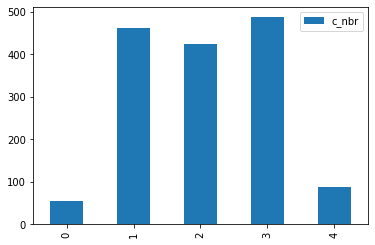

In [47]:
data = pd.read_sql('''
SELECT * 
FROM mlanciau_gold.t_twitter_postgresql_nbr_per_day
WHERE c_created_at > CURRENT_TIMESTAMP - 30 * Interval ' 1 day'
ORDER BY c_created_at
''', conn)
data.plot(kind='bar')

# Analytics on words

In [45]:
pd.read_sql('''
SELECT c_word, COUNT(*) AS c_nbr
FROM mlanciau_gold.t_twitter_postgresql_exploded
GROUP BY c_word
ORDER BY c_nbr DESC
LIMIT 20
''', conn)

,c_word,c_nbr
0,postgresql,631
1,azure,310
2,database,230
3,#postgresql,207
4,microsoft,189
5,paso,152
6,databases,139
7,with,129
8,other,110
9,server,110


# Analytics on words (filtering on c_lang = 'en')

In [46]:
pd.read_sql('''
SELECT c_word, COUNT(*) AS c_nbr
FROM mlanciau_gold.t_twitter_postgresql_exploded
WHERE c_lang = 'en'
GROUP BY c_word
ORDER BY c_nbr DESC
LIMIT 20
''', conn)

,c_word,c_nbr
0,postgresql,43
1,other,35
2,azure,34
3,flaws,31
4,could,31
5,allow,30
6,accessing,30
7,microsoft,29
8,#postgresql,22
9,customers,19


In [17]:
conn.close()